### Создаем датасет переводов

У меня есть несколько файлов переводов позиций меню на английский и китайский, из них составим датасет для файн-тюна предобученной модельки

In [2]:
import pandas as pd
import os

In [ ]:
# Создаем пустой датафрейм

df = pd.DataFrame()

In [ ]:
# Создаем список названий файлов

names = []
for elem in os.listdir("files"):
    if ".csv" in elem:
        names.append(elem)

In [ ]:
# Записываем каждый файл в переменную

text_1 = pd.read_csv(f'files/{names[0]}', delimiter=";")
text_2 = pd.read_csv(f'files/{names[1]}')
text_3 = pd.read_csv(f'files/{names[2]}')
text_4 = pd.read_csv(f'files/{names[3]}', delimiter=";")
text_5 = pd.read_csv(f'files/{names[4]}', delimiter=";")
text_6 = pd.read_csv(f'files/{names[5]}', delimiter=";")
text_7 = pd.read_csv(f'files/{names[6]}', delimiter=";")
text_8 = pd.read_csv(f'files/{names[7]}', delimiter=";")
text_9 = pd.read_csv(f'files/{names[8]}', delimiter=";")
text_10 = pd.read_csv(f'files/{names[9]}', delimiter=";")
text_11 = pd.read_csv(f'files/{names[10]}', delimiter=";")

In [ ]:
# Совмещаем два больших одинаковых файла в dataframe

for index, elem in enumerate(text_3["Russian"]):
    for indexs, element in enumerate(df["Russian"]):
        if elem == element:
            df["Chinese"][indexs] = text_3["中文"][index]

In [ ]:
# Монотонно добавляем к датафрейму остальные файлы

df = pd.concat([df, text_1], axis=0, ignore_index=True)
df = pd.concat([df, text_4], axis=0, ignore_index=True)
df = pd.concat([df, text_5], axis=0, ignore_index=True)
df = pd.concat([df, text_6], axis=0, ignore_index=True)
df = pd.concat([df, text_7], axis=0, ignore_index=True)
df = pd.concat([df, text_8], axis=0, ignore_index=True)
df = pd.concat([df, text_9], axis=0, ignore_index=True)
df = pd.concat([df, text_10], axis=0, ignore_index=True)
df = pd.concat([df, text_11], axis=0, ignore_index=True)

In [ ]:
# Убираем дубликаты переводов и сохраняем датасет

df_cleaned = df.drop_duplicates(keep="first")
df_cleaned.to_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  312 non-null    int64 
 1   Russian     312 non-null    object
 2   English     312 non-null    object
 3   Chinese     243 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.9+ KB


Поскольку китайских переводов с нулями достаточно много, а делать количество примеров на английском меньше я не хочу, дропаем полностью весь китайский столбец

In [ ]:
en_df = df_cleaned.drop("Chinese", axis=1)
en_df

,Russian,English
0,"Брускетта с рикоттой, кремом авокадо и зеленым...","Bruschetta with ricotta cheese, avocado cream..."
1,"Салат Панцанелла со страчателлой, маслинами и ...","Panzanella salad with stracciatella di bufal,..."
2,"Зеленый салат с киви, кабачком, огурцом и зеле...","Green salad with kiwi, eggplant, cucumber, pe..."
3,Крудо из свежих лосося и дорадо с томатной сал...,"Salmon and dorado crudo, tomato salsa and capers"
4,Орекьетте в фисташковом креме с тигровыми крев...,"Orecchiette pasta, pistachio crème-sauce, tig..."
...,...,...
307,"Домашний чизкейк с карамелью, голубикой, пло...","Homemade cheesecake with caramel, blueberry, i..."
308,Чёрный медовик с кремом из халвы и кардамона с...,Black honey cake with halva and cardamom cream...
309,Сет конфет ручной работы «Вкусы Енисейской ...,"Set of handmade sweets ""Tastes of the Yenisei ..."
310,Конфета из тёмного шоколада с вяленой клюкво...,Dark chocolate sweets with dried cranberries a...


In [ ]:
en_df.to_csv("data_en.csv")

#### Я ожидал, что там в сумме будет хотя бы 1000 пар переводов. Выходить из ситуации можем синтетическими данными. DeepSeek в целом прекрасно справляется с генерацией вкусно звучащих блюд, с поправкой на редкую ручную корректировку. 


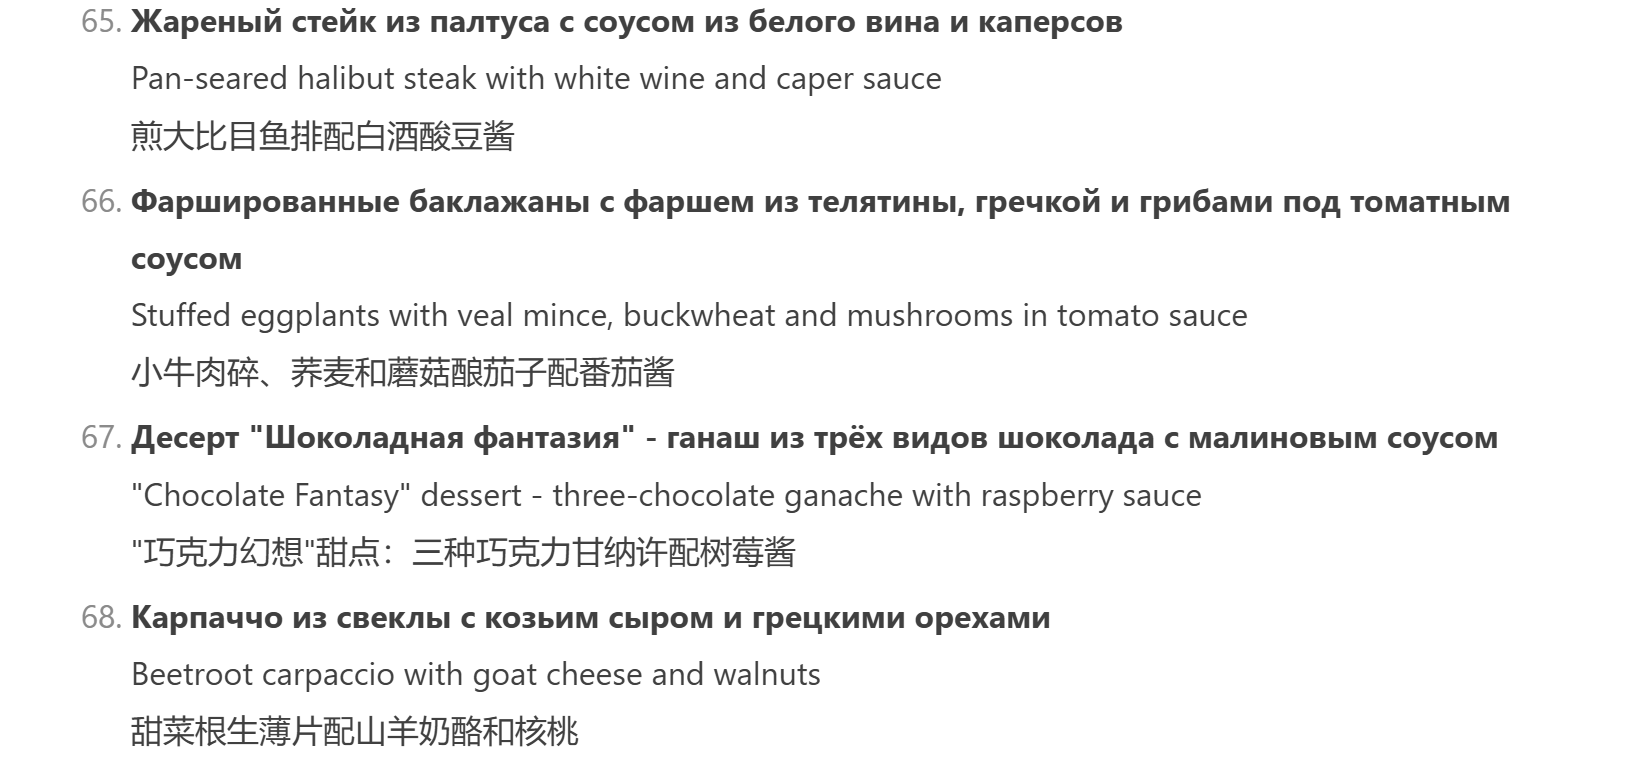

#### Ну или почти всегда...

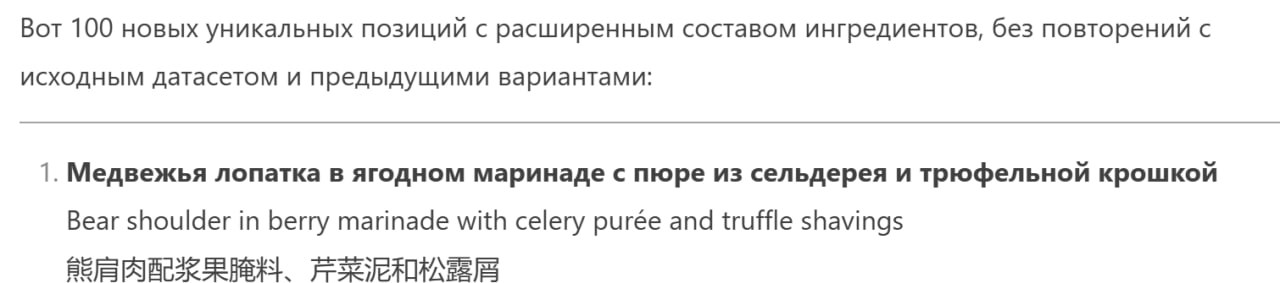

### Приступаем к аугментации -> **data_augmentation**